# NODE output humanTS

In [12]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re
import matplotlib.gridspec as gridspec
import math

In [13]:
out_dir_org = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/NODE_output/out_Bucci_ALR/"
n_taxa = 13

plot_output = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/"

# store standard matplotlib colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Coefficients boxplot over all runs

In [14]:
# Function to create a boxplot for a given axis
def create_boxplot(ax, data, title, x_labels):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 18, pad = 20)
    ax.set_xticklabels(x_labels, rotation=60, ha="right")
    # for median in boxplot['medians']:
    #     median.set_color('k')
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0

def generate_boxplot_data(folder):
    runs = [
        s for s in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, s)) and
           "." not in s and
           os.path.isfile(os.path.join(folder, s, "weighted_effectsMat.csv"))
    ]

    if not runs:
        print(f"No runs found in {folder}.")
        return None
    
    list_coeffs_all = [pd.read_csv(f"{folder}/{run}/weighted_effectsMat.csv", header=[0]).to_numpy() for run in runs]
    names = pd.read_csv(f"{folder}/{runs[0]}/weighted_effectsMat.csv", header=[0]).columns

    coeffs = [[[] for _ in range(list_coeffs_all[0].shape[0])] for _ in range(list_coeffs_all[0].shape[1])]  # n_taxa empty lists of n_effects (= n_taxa) empyt lists

    for arr in list_coeffs_all:
        for taxon in range(arr.shape[1]):
            for effect in range(arr.shape[0]):
                coeffs[taxon][effect].append(arr[taxon, effect])

    n_runs = len(runs)

    return coeffs, names, n_runs

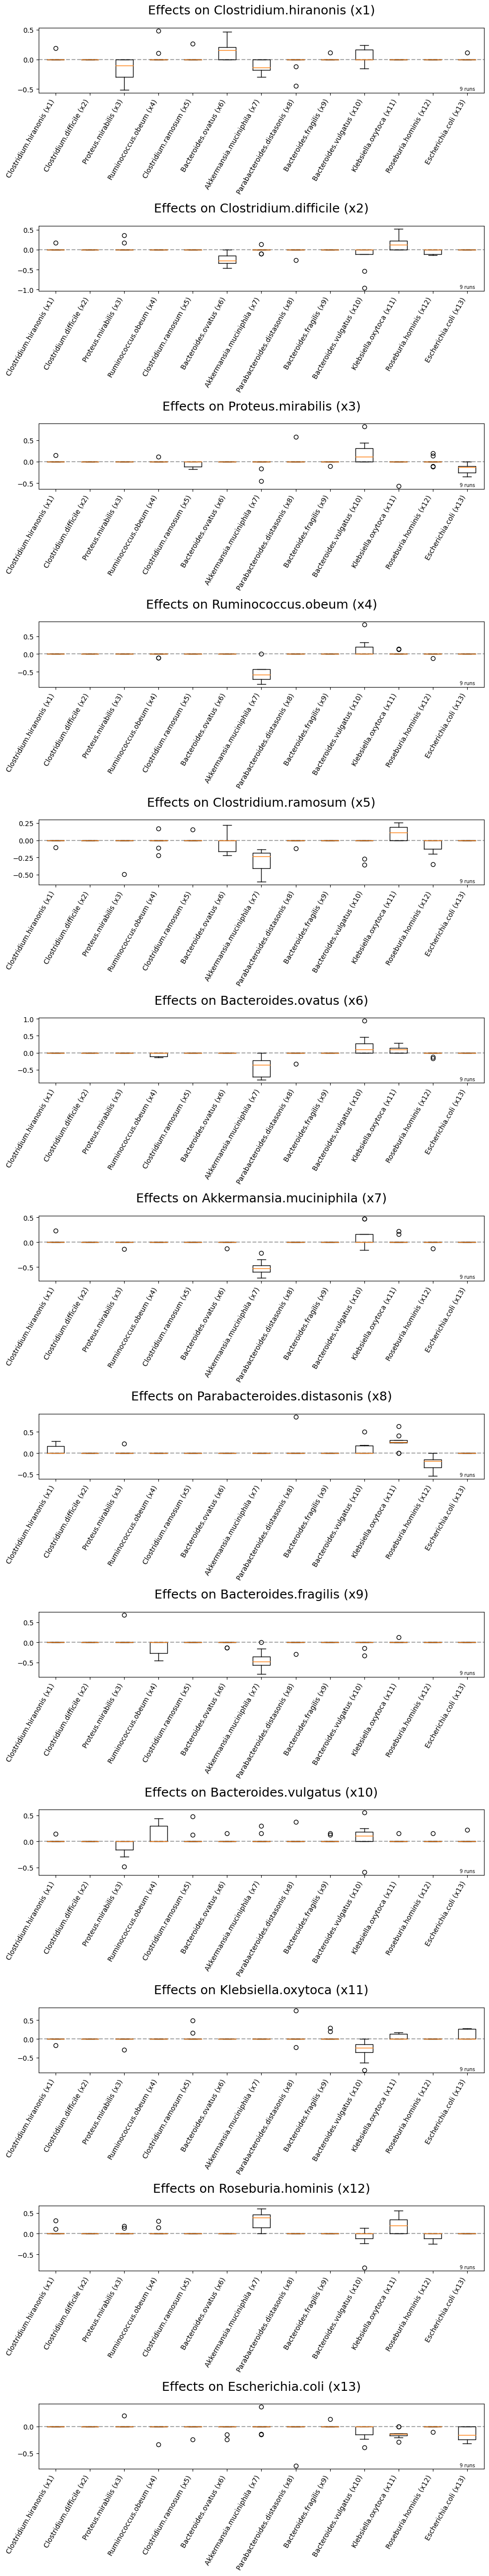

In [15]:
out_dir = out_dir_org #+ "/int3"
result = generate_boxplot_data(out_dir)
if result:
    coeffs, names, n = result
    fig, axs = plt.subplots(nrows=n_taxa, ncols=1, figsize=(10, 4*n_taxa))  # adjust figsize as needed
    names = [f"{names[i]} (x{i+1})" for i in np.arange(len(names))]
    
    for i in range(n_taxa):
        create_boxplot(axs[i], coeffs[i], f"Effects on {names[i]}", names)
        axs[i].text(0.98, 0.02, f'{n} runs', ha='right', va='bottom', fontsize=7, transform=axs[i].transAxes)

    plt.tight_layout()